<a href="https://colab.research.google.com/github/anuytok/5-HW-Ribo-seq/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Ribo_seq_%D0%95%D1%84%D0%B8%D0%BC%D0%BE%D0%B2%D0%B0_%D0%90%D0%BD%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1. Определение дифференциальной экспрессии

In [ ]:
!gdown 1iqYLFVKySREVm5Kn5NagMeHaDi-dVLcj

In [ ]:
!unzip HSE_RiboSeq_HT.zip

##Correlation

In [ ]:
import pandas as pd

counts = pd.read_csv("HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
counts = counts.fillna(value = 0)
counts.index = counts['geneID']
del counts["geneSymbol"], counts["geneID"]

counts.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,LC034-tumor-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,...,218,457,0,0,200,889,0,0,161,857.0
ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.0
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,...,92,170,109,357,60,244,141,173,56,83.0
ENSG00000000457.13,65,121,60,106,36,163,70,156,130,76,...,127,176,67,176,55,261,64,100,68,176.0
ENSG00000000460.16,8,43,18,70,16,76,4,63,44,14,...,124,437,7,167,34,201,6,61,9,58.0


Создадим отдельные датасеты для RNA-seq и Ribo-seq каунтов

In [ ]:
counts_T = counts.T

counts_T['index'] = counts_T.index
counts_T['Seq'] = counts_T["index"].apply(lambda s: s.split("-")[2])

RNA = counts_T.loc[counts_T['Seq'] == 'RNA']
RPF = counts_T.loc[counts_T['Seq'] == 'RPF']

del RNA["index"], RNA["Seq"], RPF["index"], RPF["Seq"]

RNA = RNA.T
RPF = RPF.T

RNA.head()

,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RNA,LC034-tumor-RNA,LC501-normal-RNA,LC501-tumor-RNA,LC502-normal-RNA,LC502-tumor-RNA,LC505-normal-RNA,LC505-tumor-RNA,LC506-normal-RNA,LC506-tumor-RNA,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,402.0,873.0,301.0,1627.0,258.0,65.0,226.0,353.0,208.0,399.0,153.0,361.0,157.0,333.0,218.0,457.0,200.0,889.0,161.0,857.0
ENSG00000000005.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419.12,88.0,187.0,66.0,201.0,80.0,16.0,54.0,165.0,57.0,174.0,61.0,155.0,104.0,114.0,92.0,170.0,60.0,244.0,56.0,83.0
ENSG00000000457.13,60.0,106.0,70.0,156.0,77.0,67.0,78.0,68.0,97.0,128.0,76.0,185.0,114.0,74.0,127.0,176.0,55.0,261.0,68.0,176.0
ENSG00000000460.16,18.0,70.0,4.0,63.0,60.0,4.0,17.0,112.0,28.0,14.0,8.0,118.0,25.0,98.0,124.0,437.0,34.0,201.0,9.0,58.0


1.1. Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмана? Обратите внимание, что перед вами не нормированные на глубину библиотеки каунты, учтите это при анализе.

Задание сформулировано так, что нормировать запрещается, поэтому корреляцию Пирсона точно нельзя использовать: слишком разный масштаб у данных. Поэтому используем Спирмана, для него не важен масштаб.

In [ ]:
import numpy as np
from scipy.stats import spearmanr

In [ ]:
spearman_arr = []
indexes = []
rna = 0
rpf = 0

for i in range (len(RNA)):
  for j in range (20):
    rna = rna + RNA.iloc[i:i+1, j:j+1].to_numpy()
    rpf = rpf + RPF.iloc[i:i+1, j:j+1].to_numpy()
  if rna !=0 and rpf !=0:
    spearman = spearmanr(RNA.iloc[i:i+1, :], RPF.iloc[i:i+1, :], axis = 1)[0]
    spearman_arr.append(spearman)
    indexes.append(RNA.index[i])
  rna = 0
  rpf = 0  

correlation = pd.DataFrame(data = spearman_arr, columns = ['Spearman correlation'], index = indexes)
correlation.head()

,Spearman correlation
ENSG00000000005.5,-0.139424
ENSG00000000419.12,0.849624
ENSG00000000457.13,0.697779
ENSG00000000460.16,0.811583
ENSG00000000938.12,0.518673


1.2. Постройте гистограмму распределения этих
коэффициентов корреляции. Для каких генов корреляция самая высокая, а
для каких — самая низкая? Как вы можете это объяснить?

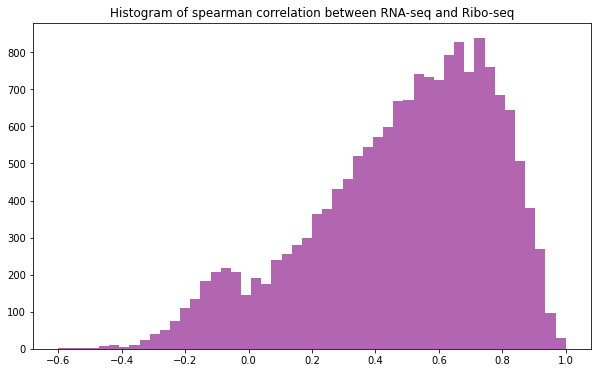

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(spearman_arr, bins=50, alpha=0.6, color = 'purple')
ax.set_title('Histogram of spearman correlation between RNA-seq and Ribo-seq')
plt.show()

Возьмем в качестве генов с высокой корреляции те, коэффициент корреляции которых больше 0.9, а с низкой те, у которых он меньш или равен -0.4

In [ ]:
correlation = correlation.sort_values('Spearman correlation', ascending = False)
high = correlation[correlation['Spearman correlation'] > 0.9]
low = correlation[correlation['Spearman correlation'] <= -0.4]

Вытащим из датасетов с каунтами по РНК-секу и Рибо-секу те гены, корреляция которых высокая или низкая

In [ ]:
RNA['index'] = RNA.index
RPF['index'] = RPF.index

high_index = high.index
low_index = low.index

high_df_RNA = RNA[RNA['index'].isin(high_index)]
low_df_RNA = RNA[RNA['index'].isin(low_index)]

high_df_RPF = RPF[RPF['index'].isin(high_index)]
low_df_RPF = RPF[RPF['index'].isin(low_index)]

Посмотрим на датасеты и для примера возьмем несколько генов из топа с высокой и низкой корреляцией из РНК-сека и Рибо-сека

In [ ]:
high_genes = ['ENSG00000001036.13', 'ENSG00000003989.16', 'ENSG00000006453.13', 'ENSG00000008517.16']
low_genes = ['ENSG00000146067.15', 'ENSG00000179965.11', 'ENSG00000203896.9', 'ENSG00000242028.5']

high_df_RNA = RNA[RNA['index'].isin(high_genes)]
high_df_RPF = RPF[RPF['index'].isin(high_genes)]

low_df_RNA = RNA[RNA['index'].isin(low_genes)]
low_df_RPF = RPF[RPF['index'].isin(low_genes)]

high_correlation = high_df_RNA.merge(high_df_RPF)
high_correlation.index = high_genes

low_correlation = low_df_RNA.merge(low_df_RPF)
low_correlation.index = low_genes

del high_correlation["index"], low_correlation["index"]

high_correlation = high_correlation.T
low_correlation = low_correlation.T

high_correlation['index'] = high_correlation.index
low_correlation['index'] = low_correlation.index

high_correlation['tissue'] = high_correlation["index"].apply(lambda s: s.split("-")[1])
high_correlation['Seq'] = high_correlation["index"].apply(lambda s: s.split("-")[2])

low_correlation['tissue'] = low_correlation["index"].apply(lambda s: s.split("-")[1])
low_correlation['Seq'] = low_correlation["index"].apply(lambda s: s.split("-")[2])

del high_correlation["index"], low_correlation["index"]

high_correlation.head()

,ENSG00000001036.13,ENSG00000003989.16,ENSG00000006453.13,ENSG00000008517.16,tissue,Seq
LC001-normal-RNA,199.0,2097.0,137.0,832.0,normal,RNA
LC001-tumor-RNA,432.0,1747.0,332.0,43.0,tumor,RNA
LC033-normal-RNA,128.0,2805.0,100.0,1087.0,normal,RNA
LC033-tumor-RNA,424.0,1049.0,423.0,1915.0,tumor,RNA
LC034-normal-RNA,203.0,4860.0,212.0,1870.0,normal,RNA


Построим scatter plot: по Х - каунты RNA-seq, по У - каунты Ribo-seq. Посмотрим сначала как меняется зависимость у генов с высокой корреляцией, затем как у генов с низкой корреляцией.

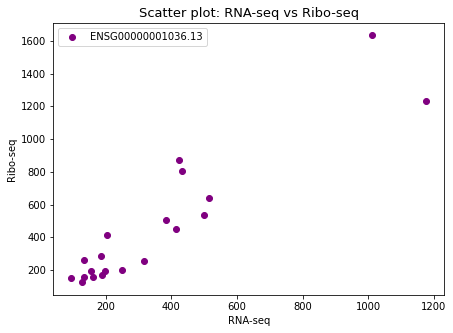

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(high_correlation.iloc[:20, 0:1], high_correlation.iloc[20:40, 0:1], 
            c='purple', label='ENSG00000001036.13')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

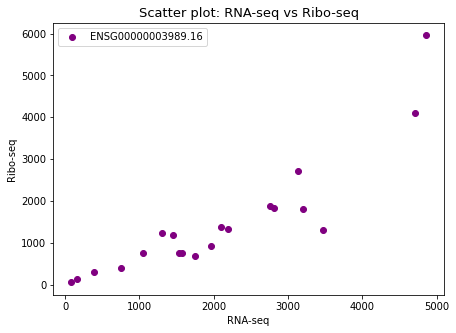

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(high_correlation.iloc[:20, 1:2], high_correlation.iloc[20:40, 1:2], 
           c='purple', label='ENSG00000003989.16')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

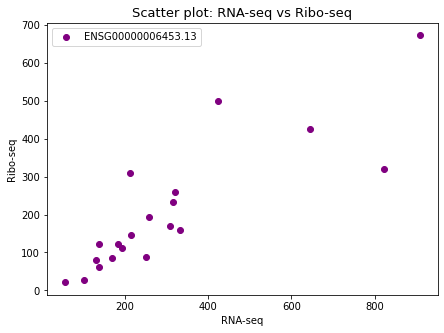

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(high_correlation.iloc[:20, 2:3], high_correlation.iloc[20:40, 2:3], 
            c='purple', label='ENSG00000006453.13')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

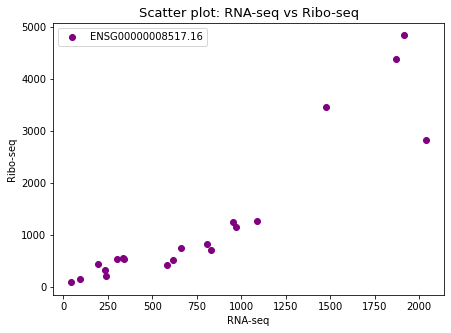

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(high_correlation.iloc[:20, 3:4], high_correlation.iloc[20:40, 3:4], 
            c='purple', label='ENSG00000008517.16')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

Итого, для выбранных для примера генов с высоким коэффициентом корреляции Спирмана можно проследить корреляцию числа каунтов в РНК-секе и Рибо-секе по образцам. Не совсем линейная зависимость, но что-то похожее прослеживается.

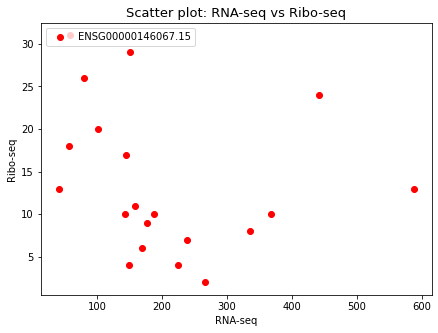

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(low_correlation.iloc[:20, 0:1], low_correlation.iloc[20:40, 0:1], 
            c='red', label='ENSG00000146067.15')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

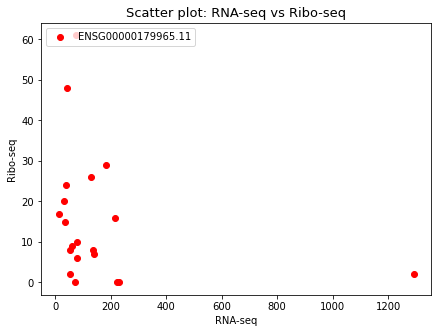

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(low_correlation.iloc[:20, 1:2], low_correlation.iloc[20:40, 1:2], 
            c='red', label='ENSG00000179965.11')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

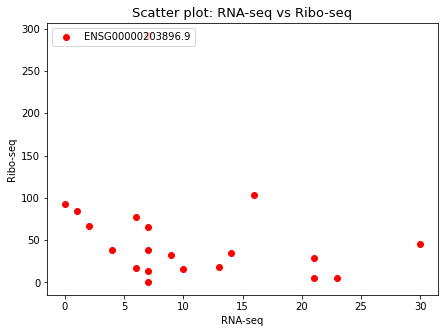

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(low_correlation.iloc[:20, 2:3], low_correlation.iloc[20:40, 2:3], 
            c='red', label='ENSG00000203896.9')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

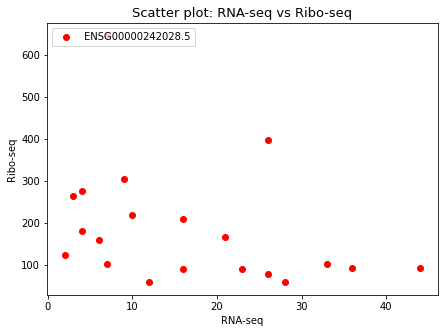

In [ ]:
plt.subplots(figsize=(7,5))

plt.scatter(low_correlation.iloc[:20, 3:4], low_correlation.iloc[20:40, 3:4], 
            c='red', label='ENSG00000242028.5')

plt.title('Scatter plot: RNA-seq vs Ribo-seq', fontsize=13)
plt.xlabel("RNA-seq")
plt.ylabel("Ribo-seq")

plt.legend(loc='upper left')
plt.show()

Итого, как и ожидалось, никакой корреляции между каунтами генов с низким коэффициентом корреляции Спирмана не наблюдается. В генах с высокой степенью корреляции по Спирману мы видели что-то похожее на линейную зависимость, а на этих графиках точки беспорядочно разбросаны. 

Таким образом, высокая/низкая корреляция генов между РНК-сек и Рибо-сек может объясняться наличием/отсутствием зависимости их каунтов в обоих секах.

Кроме scatter plot, можно построить boxplot и посмотреть, как меняется распределение каунтов генов в нормальных и опухолевых образцах РНК-сека и Рибо-сека.

Сначала для генов с высоким коэффициентом корреляции

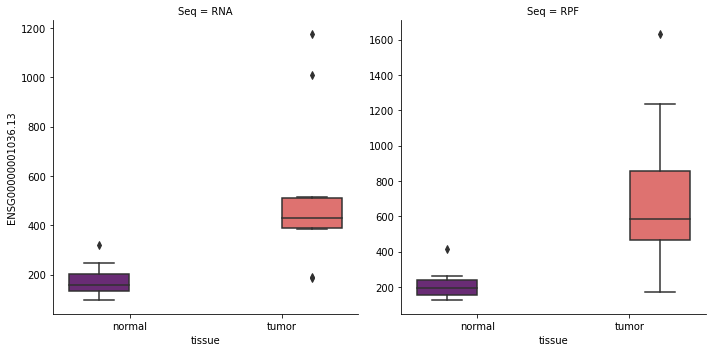

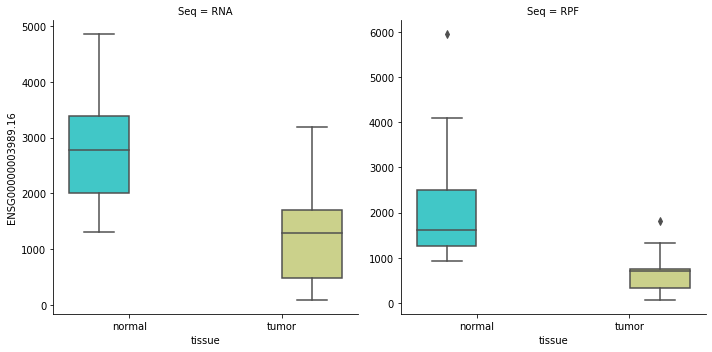

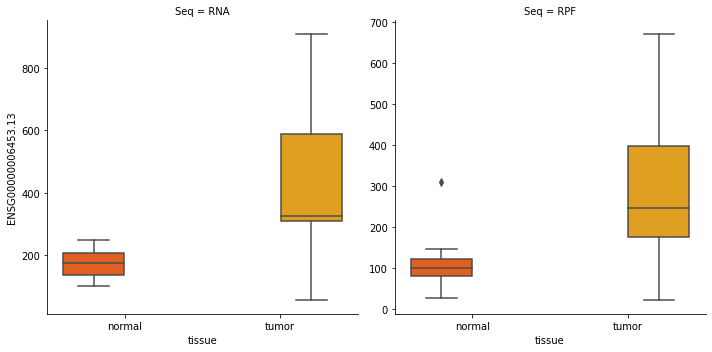

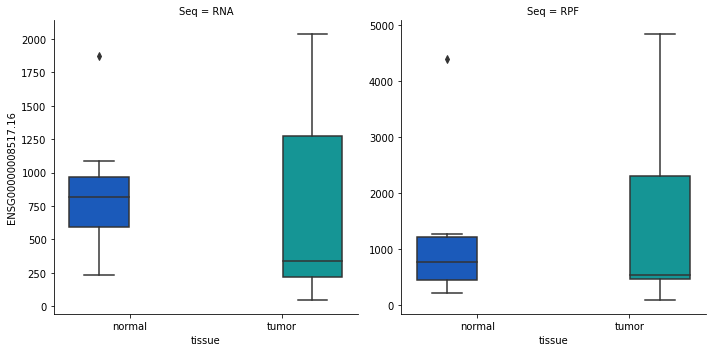

In [ ]:
import seaborn as sns

sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000001036.13', 
            hue='tissue', sharey=False, height=5, palette = 'magma')
sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000003989.16', 
            hue='tissue', sharey=False, height=5, palette = 'rainbow')
sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000006453.13', 
            hue='tissue', sharey=False, height=5, palette = 'autumn')
sns.catplot(data=high_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000008517.16', 
            hue='tissue', sharey=False, height=5, palette = 'winter')

По boxplot видим, что экспрессия генов зависит от конкретного типа ткани, откуда был взят образец. Так, 3 гена высоко экспрессированы в опухолевой ткани, а 1 высоко экспрессирован в нормальной ткани. Это может быть связано с биологическими процессами регуляции транскрипции этих генов.

Построим boxplot для генов с низким коэффициентом корреляции.

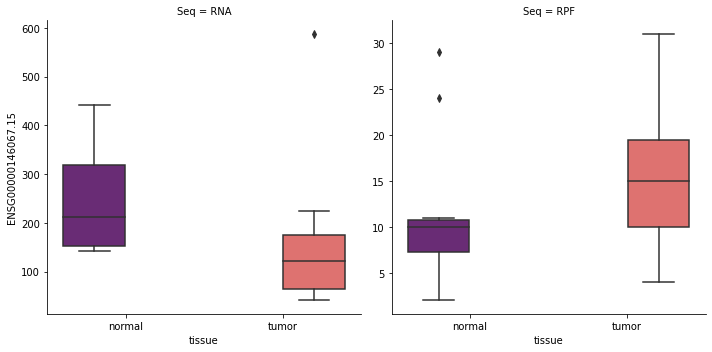

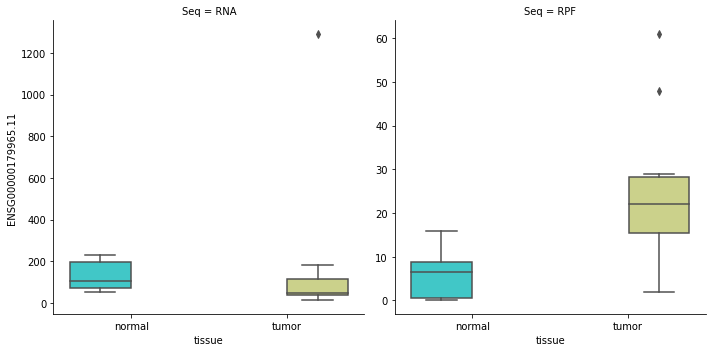

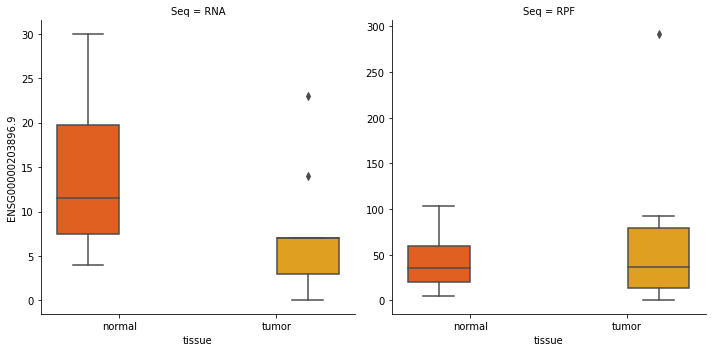

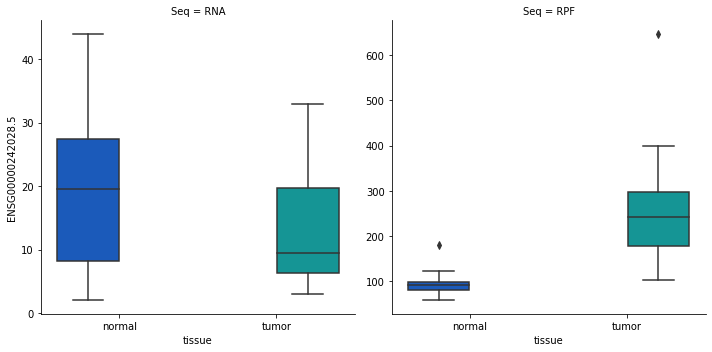

In [ ]:
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000146067.15', 
            hue='tissue', sharey=False, height=5, palette = 'magma')
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000179965.11',
            hue='tissue', sharey=False, height=5, palette = 'rainbow')
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000203896.9', 
            hue='tissue', sharey=False, height=5, palette = 'autumn')
sns.catplot(data=low_correlation, kind='box', col='Seq', x='tissue', y='ENSG00000242028.5', 
            hue='tissue', sharey=False, height=5, palette = 'winter')

Итак, можно заметить, что у генов с низким коэффициентом корреляции не прослеживается зависимость уровня экспрессии от типа ткани. Когда в нормальной ткани ген экспрессирован высоко, то в опухолевой его уровень экспресии невысокий, и наоборот. Значит, у генов с низкой корреляцией нет зависимости уровня экспрессии от типа ткани.

1.3. Проанализируйте распределение каунтов Ribo-seq:
постройте зависимость дисперсии от среднего. Похоже ли это на
NB-распределение? Если нет, то на какое похоже? Если да, то какие
статистические тесты можно использовать для подтверждения того, что перед
вами NB-распределение?


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


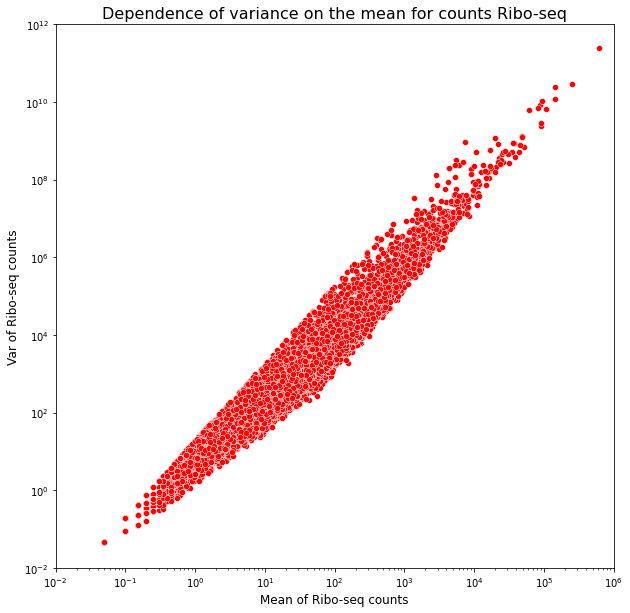

In [ ]:
RPF_mean = np.mean(RPF, axis=1)
RPF_var = np.var(RPF, axis=1)

RPF_mean = RPF_mean.to_numpy()
RPF_var = RPF_var.to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x = RPF_mean, y = RPF_var, color = 'red')
ax.set_xlabel("Mean of Ribo-seq counts", fontsize = 12)
ax.set_ylabel("Var of Ribo-seq counts", fontsize = 12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("Dependence of variance on the mean for counts Ribo-seq", fontsize = 16)
ax.set(xlim=(10**(-2),10**6),ylim=(10**(-2),10**12))
plt.show()

In [ ]:
del RPF['index']

In [ ]:
NB_RPF = RPF
NB_RPF = NB_RPF.astype(int)
NB_RPF.head()

,LC001-normal-RPF,LC001-tumor-RPF,LC033-normal-RPF,LC033-tumor-RPF,LC034-normal-RPF,LC034-tumor-RPF,LC501-normal-RPF,LC501-tumor-RPF,LC502-normal-RPF,LC502-tumor-RPF,LC505-normal-RPF,LC505-tumor-RPF,LC506-normal-RPF,LC506-tumor-RPF,LC507-normal-RPF,LC507-tumor-RPF,LC508-normal-RPF,LC508-tumor-RPF,LC509-normal-RPF,LC509-tumor-RPF
geneID,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000005.5,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0
ENSG00000000419.12,168,239,114,439,325,117,106,192,118,292,159,237,149,230,169,260,109,357,141,173
ENSG00000000457.13,65,121,36,163,130,76,34,43,84,221,74,185,65,98,81,105,67,176,64,100
ENSG00000000460.16,8,43,16,76,44,14,5,27,24,42,10,71,18,103,79,225,7,167,6,61


Полученный график совместного распределения среднего и дисперсии - это двумерное распределение, и оно не может быть похоже на NB (так как это одномерное распределение).

Двумерное распределение на графике похоже на двумерное нормальное.

Нужно проверить, что распределение каунтов распределено NB (это одномерное распределение). Для этого можно применить тест Колмогорова-Смирнова (также можно использовать хи-квадрат). Для этого в качестве одного из аргументов возьмем выборку каунтов, а в качестве второго выбрать NB (или сгенерировать выборку из него).

Долго пыталась оптимизировать, пришлось делац так

In [ ]:
NB_df = []
for i in NB_RPF.columns:
  innerlist = []
  NB_list = NB_RPF[i].values.tolist()
  innerlist.append(NB_list)
  NB_df.append(innerlist)

one0 = np.array(NB_df[0])
one1 = np.array(NB_df[1])
one2 = np.array(NB_df[2])
one3 = np.array(NB_df[3])
one4 = np.array(NB_df[4])
one5 = np.array(NB_df[5])
one6 = np.array(NB_df[6])
one7 = np.array(NB_df[7])
one8 = np.array(NB_df[8])
one9 = np.array(NB_df[9])
one10 = np.array(NB_df[10])
one11 = np.array(NB_df[11])
one12 = np.array(NB_df[12])
one13 = np.array(NB_df[13])
one14 = np.array(NB_df[14])
one15 = np.array(NB_df[15])
one16 = np.array(NB_df[16])
one17 = np.array(NB_df[17])
one18 = np.array(NB_df[18])
one19 = np.array(NB_df[19])

NB_genes = np.concatenate ((one0,one1), axis= None)
NB_genes = np.concatenate ((NB_genes,one2), axis= None)
NB_genes = np.concatenate ((NB_genes,one3), axis= None)
NB_genes = np.concatenate ((NB_genes,one4), axis= None)
NB_genes = np.concatenate ((NB_genes,one5), axis= None)
NB_genes = np.concatenate ((NB_genes,one6), axis= None)
NB_genes = np.concatenate ((NB_genes,one7), axis= None)
NB_genes = np.concatenate ((NB_genes,one8), axis= None)
NB_genes = np.concatenate ((NB_genes,one9), axis= None)
NB_genes = np.concatenate ((NB_genes,one12), axis= None)
NB_genes = np.concatenate ((NB_genes,one13), axis= None)
NB_genes = np.concatenate ((NB_genes,one14), axis= None)
NB_genes = np.concatenate ((NB_genes,one15), axis= None)
NB_genes = np.concatenate ((NB_genes,one16), axis= None)
NB_genes = np.concatenate ((NB_genes,one17), axis= None)
NB_genes = np.concatenate ((NB_genes,one18), axis= None)
NB_genes = np.concatenate ((NB_genes,one19), axis= None)

len(NB_genes)

341010

In [ ]:
import scipy
from scipy import stats
from scipy.stats import kstest
import numpy as np
from numpy import random
from numpy.random import default_rng

NB = np.random.negative_binomial(1, 0.1, 1000)
stats.kstest(NB_genes, NB)

KstestResult(statistic=0.3916235007771033, pvalue=2.86640836866075e-138)

pvalue < 0.05, тогда гипотеза о том что распределение каунтов распределено NB подтверждается.

##DESeq2

1.4. а) Найдите дифференциально экспрессированные гены по
RNA-Seq между нормой и опухолью. Для этого можете использовать DESeq2
или edgeR (для DESeq есть обёртка на Python). 

б) Постройте volcano plot. 

То же самое сделайте и для Ribo-Seq эксперимента. 

в) Совпадают ли результаты
дифференциальной экспрессии? Какие гены оказались значимо различны по
экспрессии в одном случае, а какие — в другом? 

г) Проведите похожий анализ,
только с поиском генов с разницей в эффективности трансляции (~ method +
condition + method:condition). 

д) Что вы скажете о наборе генов, который
вы получили этим методом? Выводы подкрепите графиками.

In [ ]:
!Rscript -e 'install.packages(c("BiocManager"), repos="https://cloud.r-project.org")'

In [ ]:
!Rscript -e 'BiocManager::install("DESeq2")'

In [ ]:
!pip install rpy2

In [ ]:
from rpy2.robjects.packages import importr
from rpy2.robjects import default_converter, Formula, pandas2ri
from rpy2.robjects.conversion import localconverter, rpy2py

from rpy2.robjects.methods import RS4

pandas2ri.activate()
with localconverter(default_converter + pandas2ri.converter):
    base = importr("base")
    DESeq2 = importr("DESeq2")

a) Найдем дифференциально экспрессированные гены по
RNA-Seq между нормой и опухолью.

In [ ]:
del RNA['index']

Создаем метадату

In [ ]:
meta_RNA = pd.DataFrame({"Tissue": (["Normal","Tumor"])*10}, index=RNA.columns)
meta_RNA.head()

,Tissue
LC001-normal-RNA,Normal
LC001-tumor-RNA,Tumor
LC033-normal-RNA,Normal
LC033-tumor-RNA,Tumor
LC034-normal-RNA,Normal


Вычислим коэффициенты нормализации

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  dds = DESeq2.DESeqDataSetFromMatrix(countData=RNA, colData=meta_RNA, design=Formula("~ Tissue"))
  dds = DESeq2.DESeq(dds)

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  res_RNA = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
  res_RNA = pd.DataFrame(base.as_data_frame(res_RNA))
  res_RNA.index = RNA.index

res_RNA.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000000003.14,406.279268,1.016935,0.396326,2.565906,0.010291,0.038159
ENSG00000000005.5,0.255801,-0.756176,3.025600,-0.249926,0.802645,NaN
ENSG00000000419.12,105.871975,0.636650,0.319406,1.993232,0.046236,0.120018
ENSG00000000457.13,104.480304,0.305490,0.238250,1.282226,0.199763,0.348097
ENSG00000000460.16,62.812560,1.553462,0.547881,2.835400,0.004577,0.020282


Найдем дифференциально экспрессированные гены по
Ribo-Seq между нормой и опухолью.

Создаем метадату

In [ ]:
meta_RPF = pd.DataFrame({"Tissue": (["Normal","Tumor"])*10}, index=RPF.columns)
meta_RPF.head()

,Tissue
LC001-normal-RPF,Normal
LC001-tumor-RPF,Tumor
LC033-normal-RPF,Normal
LC033-tumor-RPF,Tumor
LC034-normal-RPF,Normal


Вычислим коэффициенты нормализации

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  dds = DESeq2.DESeqDataSetFromMatrix(countData=RPF, colData=meta_RPF, design=Formula("~ Tissue"))
  dds = DESeq2.DESeq(dds)

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  res_RPF = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
  res_RPF = pd.DataFrame(base.as_data_frame(res_RPF))
  res_RPF.index = RPF.index

res_RPF.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000000003.14,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000000005.5,0.134227,-0.497105,3.026188,-0.164268,0.869521,NaN
ENSG00000000419.12,187.335949,-0.111414,0.207386,-0.537228,0.591110,0.750365
ENSG00000000457.13,88.779354,0.055055,0.245021,0.224694,0.822217,0.904063
ENSG00000000460.16,42.182053,1.367345,0.481942,2.837153,0.004552,0.030767


Отсортируем датасеты по убыванию padj

In [ ]:
res_RNA = res_RNA.sort_values("padj")
res_RPF = res_RPF.sort_values("padj")
res_RPF.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000087237.10,234.706196,-3.661168,0.328144,-11.157205,6.603531e-29,9.219850e-25
ENSG00000138315.12,378.527099,-4.123941,0.384101,-10.736618,6.850819e-27,4.782557e-23
ENSG00000145850.8,115.823325,-4.410428,0.424721,-10.384291,2.923339e-25,1.360522e-21
ENSG00000152990.13,351.272069,-3.789142,0.368147,-10.292473,7.619383e-25,2.659546e-21
ENSG00000104938.16,60.025648,-6.019149,0.589470,-10.211112,1.768264e-24,4.937702e-21


б) Построим volcano plot для RNA-seq

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log$_{10}$FDR')

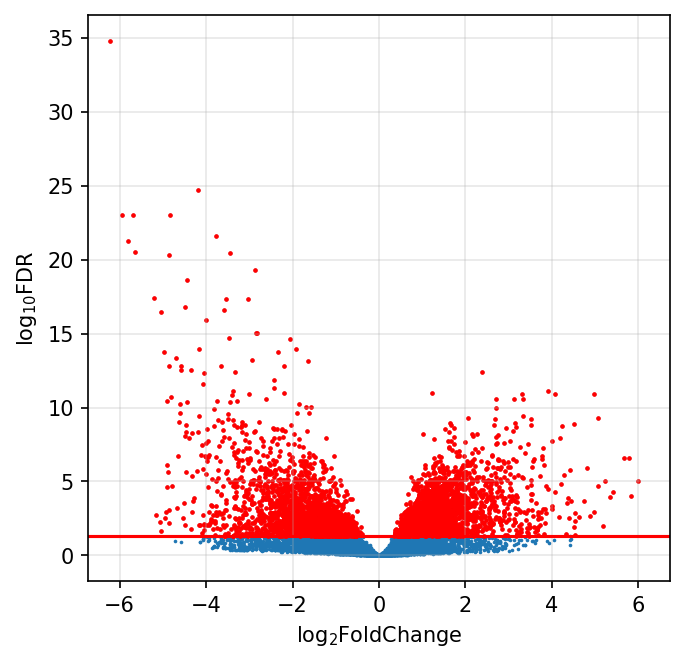

In [ ]:
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(res_RNA.log2FoldChange), (max(res_RNA.log2FoldChange))) + 0.5

sns.scatterplot(
    x=res_RNA.log2FoldChange,
    y=-np.log10(res_RNA.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=res_RNA[res_RNA.padj < p_tr].log2FoldChange,
    y=-np.log10(res_RNA[res_RNA.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")

Построим volcano plot для Ribo-seq

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log$_{10}$FDR')

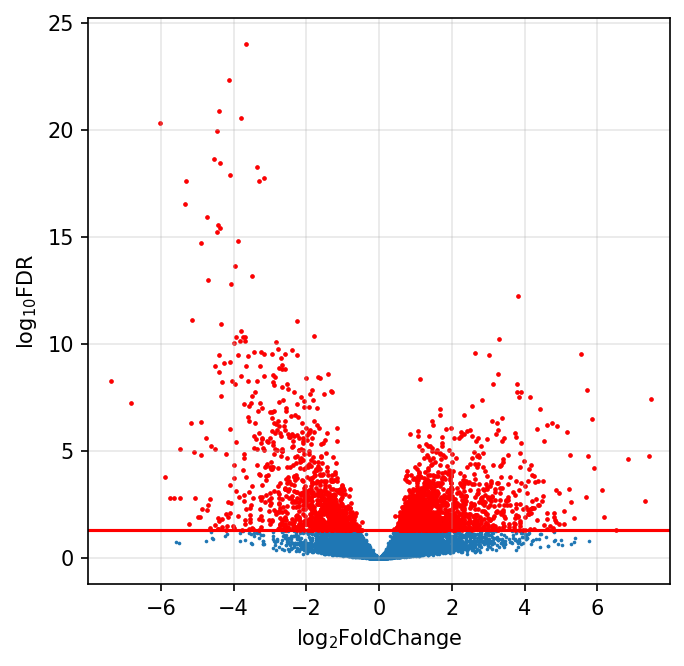

In [ ]:
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(res_RPF.log2FoldChange), (max(res_RPF.log2FoldChange))) + 0.5

sns.scatterplot(
    x=res_RPF.log2FoldChange,
    y=-np.log10(res_RPF.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=res_RPF[res_RPF.padj < p_tr].log2FoldChange,
    y=-np.log10(res_RPF[res_RPF.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")

в) Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом?

Построим диаграму Венна и посмотрим на пересечение дифференциально экспрессированных генов между RNA-seq и Ribo-seq

In [ ]:
!pip install matplotlib-venn

In [ ]:
from matplotlib_venn import venn2

Отберем  значимо (padj < 0.05) дифференциально экспрессированные гены

In [ ]:
RNA_dif = res_RNA.loc[res_RNA["padj"] < 0.05]
RNA_dif.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000182566.12,187.902511,-6.224294,0.471543,-13.199842,8.791966e-40,1.464478e-35
ENSG00000138315.12,207.433311,-4.190143,0.372389,-11.252055,2.262593e-29,1.884400e-25
ENSG00000166148.3,216.785200,-4.836026,0.444956,-10.868551,1.627649e-27,8.917125e-24
ENSG00000129965.13,517.466267,-5.941896,0.547969,-10.843493,2.141352e-27,8.917125e-24
ENSG00000160339.15,154.170314,-5.700993,0.527201,-10.813696,2.964778e-27,9.876861e-24


In [ ]:
RPF_dif = res_RPF.loc[res_RPF["padj"] < 0.05]
RPF_dif.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000087237.10,234.706196,-3.661168,0.328144,-11.157205,6.603531e-29,9.219850e-25
ENSG00000138315.12,378.527099,-4.123941,0.384101,-10.736618,6.850819e-27,4.782557e-23
ENSG00000145850.8,115.823325,-4.410428,0.424721,-10.384291,2.923339e-25,1.360522e-21
ENSG00000152990.13,351.272069,-3.789142,0.368147,-10.292473,7.619383e-25,2.659546e-21
ENSG00000104938.16,60.025648,-6.019149,0.589470,-10.211112,1.768264e-24,4.937702e-21


Сделаем список из  значимо (padj < 0.05) дифференциально экспрессированных генов

In [ ]:
genes_RNA_dif = RNA_dif.index
genes_RPF_dif = RPF_dif.index

genes_RNA = list(genes_RNA_dif)
genes_RPF = list(genes_RPF_dif)

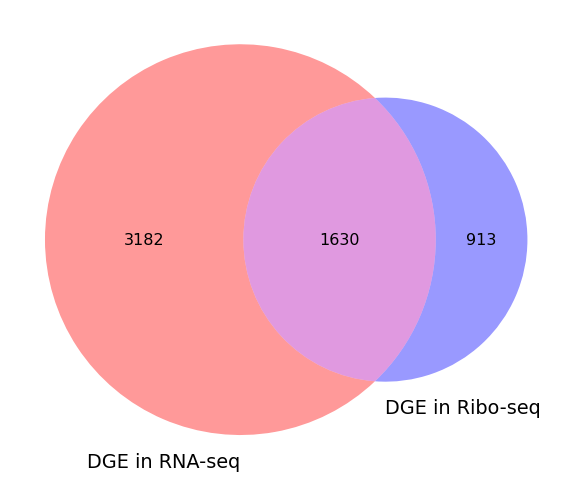

In [ ]:
set1 = set(genes_RNA)
set2 = set(genes_RPF)

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
venn2(subsets = (set1, set2), set_labels = ('DGE in RNA-seq', 'DGE in Ribo-seq'), alpha=0.4, set_colors=('r', 'b'))

Таким образом, в эксперименте RNA-seq 4812 значимо (padj < 0.05) дифференциально экспрессированных генов, когда в Ribo-seq их 2543, то есть почти в 2 раза меньше. 

По диаграме Венна видно, что в пересечении двух экспериментов нашлось 1630 значимо (padj < 0.05) дифференциально экспрессированных генов, 3182 гена значимо (padj < 0.05) дифференциально экспрессированы только в RNA-seq и 913 генов значимо (padj < 0.05) дифференциально экспрессированы только в Ribo-seq.

Возьмем топ-15 генов по значимой дифференциальной экспрессии (с наибольшим и наименьшим log2foldchange) из обоих экспериментов и посмотрим на них.

In [ ]:
RNA_dif = RNA_dif.sort_values("log2FoldChange", ascending = False)
RPF_dif = RPF_dif.sort_values("log2FoldChange", ascending = False)

RNA_dif_high = RNA_dif.head(15)
RNA_dif_low = RNA_dif.iloc[4797:4812,:]

RPF_dif_high = RPF_dif.head(15)
RPF_dif_low = RPF_dif.iloc[2528:2543,:]

Переведем ensembl в GeneSymbol

In [ ]:
RNA_dif_high['ensembl'] = RNA_dif_high.index
RNA_dif_low['ensembl'] = RNA_dif_low.index
RPF_dif_high['ensembl'] = RPF_dif_high.index
RPF_dif_low['ensembl'] = RPF_dif_low.index

In [ ]:
counts['GeneSymbol'] = genes
counts['ensembl'] = RNA.index

In [ ]:
RNA_DGE_high = counts[counts['ensembl'].isin(RNA_dif_high['ensembl'])]
RNA_DGE_low = counts[counts['ensembl'].isin(RNA_dif_low['ensembl'])]
RPF_DGE_high = counts[counts['ensembl'].isin(RPF_dif_high['ensembl'])]
RPF_DGE_low = counts[counts['ensembl'].isin(RPF_dif_low['ensembl'])]


RNA_DGE_high = RNA_DGE_high['GeneSymbol']
RNA_DGE_low = RNA_DGE_low['GeneSymbol']
RPF_DGE_high = RPF_DGE_high['GeneSymbol']
RPF_DGE_low = RPF_DGE_low['GeneSymbol']

In [ ]:
RNA_dif_high['GeneSymbol'] = RNA_DGE_high
RNA_dif_low['GeneSymbol'] = RNA_DGE_low
RPF_dif_high['GeneSymbol'] = RPF_DGE_high
RPF_dif_low['GeneSymbol'] = RPF_DGE_low

del RNA_dif_high['ensembl']
del RNA_dif_low['ensembl']
del RPF_dif_high['ensembl']
del RPF_dif_low['ensembl']

list_RNA_dif_high = list(RNA_dif_high['GeneSymbol'])
list_RNA_dif_low = list(RNA_dif_low['GeneSymbol'])
list_RPF_dif_high = list(RPF_dif_high['GeneSymbol'])
list_RPF_dif_low = list(RPF_dif_low['GeneSymbol'])

In [ ]:
DGE = pd.DataFrame({
    'RNA DEG high expr': list_RNA_dif_high,
    'RNA DEG low expr': list_RNA_dif_low,
    'RPF DEG high expr': list_RPF_dif_high,
    'RPF DEG low expr': list_RPF_dif_low
    })
DGE        

,RNA DEG high expr,RNA DEG low expr,RPF DEG high expr,RPF DEG low expr
0,DLK1,CYP2A7,AFP,PDZRN4
1,SLC22A12,PHACTR3,DLK1,CYP26A1
2,DKK1,MYO3A,MEP1A,DBH
3,PEG10,AICDA,FER1L6,IGKV2-30
4,AFP,FREM2,TNFSF4,PRR4
5,MEP1A,RP11-723O4.6,COX7B2,CNDP1
6,FER1L6,CYP2B6,ETV4,CLEC1B
7,REG3A,AVPR1B,PNMA3,SYT9
8,UPK3A,C8orf34,PEG10,IL1RAPL2
9,S100P,DBH,S100P,IGHV1-45


Общие дифференциально экспрессированные гены для RNA-seq и Ribo-seq с увеличенной экспрессией в опухолевых образцах пациентов с гепатоцеллюлярной карциномой по сравнению с контролем (нормальными): DLK1, DKK1, PEG10, AFP, MEP1A, FER1L6, S100P, GPC3, FRRS1L.

Общие дифференциально экспрессированные гены для RNA-seq и Ribo-seq с уменьшенной экспрессией в опухолевых образцах пациентов с гепатоцеллюлярной карциномой по сравнению с контролем (нормальными): CLEC4M, DBH.

Поищем в статьях информацию о важности найденных генов в прогрессировании/ингибировании гепатоцеллюлярной карциномы.

### DLK1
the up-regulation of DLK1 plays a crucial role in maintenance of cancerous stem or progenitor cells with malignant characteristics, because the colony formation, cell growth and tumorigenicity of HCC cell lines were significantly decreased as the knockdown of endogenetic DLK1

https://doi.org/10.1093/carcin/bgl215

### DKK1
DKK1 appears to facilitate tumor invasion and migration through TGF- β1 by remodeling the tumor microenvironment and inducing inflammation

https://doi.org/10.1371/journal.pone.0223252

### PEG10
PEG10 might be involved in oncogenesis by increasing the apoptotic resistance of the tumor cells.

PEG10 protein could be a potential biomarker predicting early recurrence and recurrence-free survival in HCC patients after curative resection, even in those with normal serum α-fetoprotein levels.

https://doi.org/10.4143/crt.2014.124

### AFP
serum alpha-fetoprotein (AFP) was routinely employed as a tumor marker for screening, diagnosis, and treatment follow-up of hepatocellular carcinoma

https://doi.org/10.3390/jcm8101736

### MEP1A
MEP1A contributes to tumor progression and predicts poor clinical outcome in human hepatocellular carcinoma.

MEP1A is a novel prognostic predictor in HCC and plays an important role in the development and progression of HCC.

https://doi.org/10.1002/hep.28397

### S100P
The calcium-binding protein S100P is expressed in a variety of human cancer cells and is important in cancer cell growth and invasion.

https://doi.org/10.1371/journal.pone.0065501



### GPC3 
GPC3 promotes HCC growth and metastasis by activating the canonical Wnt and other signaling pathways.

https://doi.org/10.2147/JHC.S116513

Литературный анализ показал, что гены с высокой экспрессией в опухолевых образцах стимулируют прогрессирование, инвазию, рост и метастазирование гепатоцеллюлярной карциномы.

### CLEC4M 
CLEC4M overexpression inhibits progression and is associated with a favorable prognosis in hepatocellular carcinoma

https://doi.org/10.3892/mmr.2020.11336

### FCN2
Low level of FCN2 in HCCs is correlated with aggressive metastatic features, and would be a prognostic factor for overall disease-free survival of HCC patients.

https://doi.org/10.1016/j.canlet.2016.05.007

### HAMP 
HAMP Downregulation Contributes to Aggressive Hepatocellular Carcinoma via Mechanism Mediated by Cyclin4-Dependent Kinase-1/STAT3 Pathway

https://doi.org/10.3390/diagnostics9020048

### CLEC1B
Low expression of CLEC1B can significantly promote the growth rate of HCC cells, shorten the tumor doubling time, and aggravate the poor prognosis of patients.

https://doi.org/10.1186/s12885-022-10195-1

Таким образом, некоторые из downregulated genes ингибируют прогрессирование гепатоцеллюлярной карциномы, а некоторые наоборот усиливают ее рост и метастазирование.

г) Проведите похожий анализ, только с поиском генов с разницей в эффективности трансляции (~ method + condition + method:condition).

In [ ]:
counts = pd.read_csv("HSE_RiboSeq_HT/01. RiboSeq_RNASeq_HCC_counts.tsv", sep="\t")
genes = list(counts["geneSymbol"])
counts = counts.fillna(value = 0)
counts.index = counts['geneID']
del counts["geneSymbol"], counts["geneID"]

Создаем метадату

In [ ]:
meta_counts = pd.DataFrame({
    "Tissue": (["Normal","Tumor"])*20,
    "Seq": (["RPF"]*2 + ['RNA']*2)*10,
    }, index=counts.columns)
meta_counts.head()

,Tissue,Seq
LC001-normal-RPF,Normal,RPF
LC001-tumor-RPF,Tumor,RPF
LC001-normal-RNA,Normal,RNA
LC001-tumor-RNA,Tumor,RNA
LC033-normal-RPF,Normal,RPF


Вычислим коэффициенты нормализации

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta_counts, design=Formula("~ Tissue + Seq + Tissue:Seq"))
  dds = DESeq2.DESeq(dds)

In [ ]:
with localconverter(default_converter + pandas2ri.converter):
  res_counts = DESeq2.results(dds, name="TissueTumor.SeqRPF")
  res_counts = pd.DataFrame(base.as_data_frame(res_counts))
  res_counts.index = counts.index
  res_counts = res_counts.sort_values("padj")

res_counts.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000172869.14,292.358919,-1.242948,0.250249,-4.966847,6.805028e-07,0.005695
ENSG00000117143.13,524.937253,-1.852040,0.372283,-4.974812,6.531085e-07,0.005695
ENSG00000142002.16,19998.727349,2.699844,0.557605,4.841855,1.286329e-06,0.007176
ENSG00000164045.11,28.822459,3.896988,0.820834,4.747594,2.058507e-06,0.008613
ENSG00000196872.10,9.758817,3.937915,0.884599,4.451639,8.521747e-06,0.028526


Построим volcano plot

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log$_{10}$FDR')

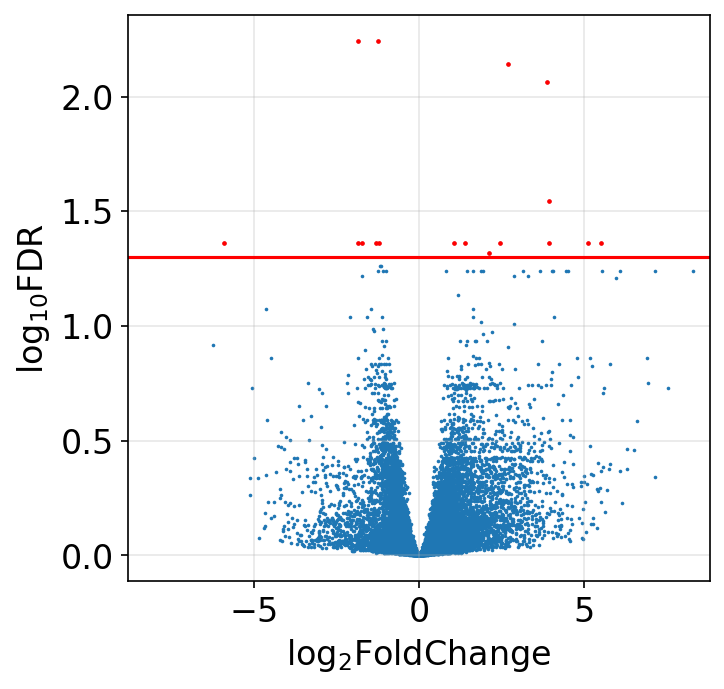

In [ ]:
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(res_counts.log2FoldChange), (max(res_counts.log2FoldChange))) + 0.5

sns.scatterplot(
    x=res_counts.log2FoldChange,
    y=-np.log10(res_counts.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=res_counts[res_counts.padj < p_tr].log2FoldChange,
    y=-np.log10(res_counts[res_counts.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")

Построим диаграму Венна и посмотрим на пересечение дифференциально экспрессированных генов с разницей в эффективности трансляции c генами RNA-seq и генами Ribo-seq

Отберем  значимо (padj < 0.05) дифференциально экспрессированные гены

In [ ]:
counts_dif = res_counts.loc[res_counts["padj"] < 0.05]

print(len(counts_dif))
counts_dif.head()

17


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000172869.14,292.358919,-1.242948,0.250249,-4.966847,6.805028e-07,0.005695
ENSG00000117143.13,524.937253,-1.852040,0.372283,-4.974812,6.531085e-07,0.005695
ENSG00000142002.16,19998.727349,2.699844,0.557605,4.841855,1.286329e-06,0.007176
ENSG00000164045.11,28.822459,3.896988,0.820834,4.747594,2.058507e-06,0.008613
ENSG00000196872.10,9.758817,3.937915,0.884599,4.451639,8.521747e-06,0.028526


Сделаем список из  значимо (padj < 0.05) дифференциально экспрессированных генов

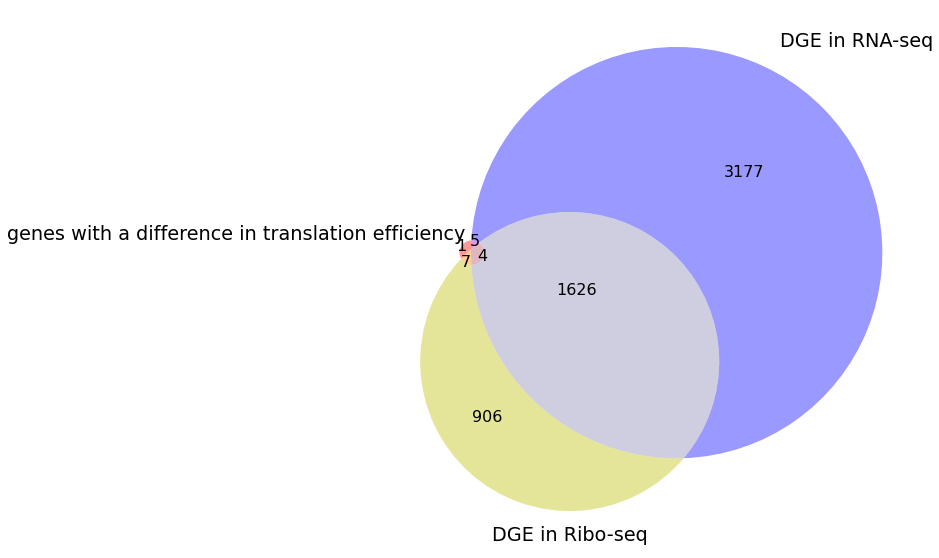

In [ ]:
from matplotlib_venn import venn3
genes_counts_dif = counts_dif.index
genes_counts = list(genes_counts_dif)

set1 = set(genes_counts)
set2 = set(genes_RNA)
set3 = set(genes_RPF)

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
venn3(subsets = (set1, set2, set3), set_labels = ('genes with a difference in translation efficiency', 
                                                  'DGE in RNA-seq', 'DGE in Ribo-seq'), alpha=0.4, 
                                                  set_colors=('r', 'b', 'y'))

Таким образом, значимо (padj < 0.05) дифференциально экспрессированных генов с разницей в эффективности трансляции 17. В пересечении со  значимо (padj < 0.05) дифференциально экспрессированными генами из RNA-seq и Ribo-seq обнаружилось всего 4 гена. В пересечении со  значимо (padj < 0.05) дифференциально экспрессированными генами из RNA-seq - 5 генов. В пересечении со  значимо (padj < 0.05) дифференциально экспрессированными генами из Ribo-seq - 7 генов. Только 1 ген вне пересечения с генами RNA-seq и Ribo-seq. 

Отсортируем полученные гены по log2FoldChange и выберем из них те, экспрессия которых по модулю > 1.8

In [ ]:
counts_dif = counts_dif.sort_values("log2FoldChange", ascending = False)
counts_dif = counts_dif.loc[counts_dif["log2FoldChange"].abs() >= 1.8]
counts_dif.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
geneID,,,,,,
ENSG00000109705.7,5.226597,5.505710,1.295173,4.250944,0.000021,0.043249
ENSG00000105464.3,11.360857,5.129686,1.251194,4.099832,0.000041,0.043249
ENSG00000196872.10,9.758817,3.937915,0.884599,4.451639,0.000009,0.028526
ENSG00000176749.8,9.197213,3.934618,0.947444,4.152876,0.000033,0.043249
ENSG00000164045.11,28.822459,3.896988,0.820834,4.747594,0.000002,0.008613


Переведем ensembl в GeneSymbol

In [ ]:
counts_dif['ensembl'] = counts_dif.index

counts['GeneSymbol'] = genes
counts['ensembl'] = RNA.index

counts_DGE = counts[counts['ensembl'].isin(counts_dif['ensembl'])]
counts_DGE = counts_DGE['GeneSymbol']

counts_dif['GeneSymbol'] = counts_DGE
del counts_dif['ensembl']
counts_dif

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneSymbol
geneID,,,,,,,
ENSG00000109705.7,5.226597,5.505710,1.295173,4.250944,2.128714e-05,0.043249,NKX3-2
ENSG00000105464.3,11.360857,5.129686,1.251194,4.099832,4.134493e-05,0.043249,GRIN2D
ENSG00000196872.10,9.758817,3.937915,0.884599,4.451639,8.521747e-06,0.028526,KIAA1211L
ENSG00000176749.8,9.197213,3.934618,0.947444,4.152876,3.283228e-05,0.043249,CDK5R1
ENSG00000164045.11,28.822459,3.896988,0.820834,4.747594,2.058507e-06,0.008613,CDC25A
ENSG00000142002.16,19998.727349,2.699844,0.557605,4.841855,1.286329e-06,0.007176,DPP9
ENSG00000160949.16,33.954890,2.467563,0.592995,4.161186,3.165995e-05,0.043249,TONSL
ENSG00000196313.11,55.592229,2.109257,0.519393,4.061006,4.886179e-05,0.048106,POM121
ENSG00000152990.13,383.500667,-1.831565,0.428650,-4.272871,1.929719e-05,0.043249,ADGRA3


Поищем в статьях информацию о важности некоторых найденных генов в прогрессировании/ингибировании гепатоцеллюлярной карциномы.

### GRIN2D
GRIN2D was significantly correlated with LIHC clinical prognosis, clinical stage, immune infiltration, immune response, and vital signaling pathways.

https://doi.org/10.3389/fonc.2022.877657

### CDK5R1
Elevated CDK5R1 predicts worse prognosis in hepatocellular carcinoma

https://doi.org/10.1042/BSR20203594

### CDC25A
Overexpression of CDC25A in human hepatocellular carcinoma (HCC) tissue samples was associated with poor prognosis.

CDC25A inhibition suppresses the growth and invasion of human hepatocellular carcinoma cells.

https://doi.org/10.3892/ijmm.21.2.145



Литературный анализ показал, что гены с высокой экспрессией в опухолевых образцах обечпечивают плохой прогноз лечения  гепатоцеллюлярной карциномы. Также было показано, что подавление экспрессии CDC25A ингибирует рост и инвазию опухолевых клеток  гепатоцеллюлярной карциномы, из чего можно сделать предположение, что его высокая экспрессия обеспечивает обратное.

 

### LRRC19
LRRC19 was showed for its prognostic value in Liver Hepatocellular Carcinoma (LIHC)

https://doi.org/10.3390/genes11040440


### UAP1L1
UAP1L1 was significantly upregulated in hepatocellular carcinoma tissues and that a high level of UAP1L1 expression predicted a poor prognosis.

https://doi.org/10.1038/s41388-018-0442-6

Downregulated genes в датасете было мало, однако в одном исследовании было показано, что высокий уровень экспрессии UAP1L1 в тканях  гепатоцеллюлярной карциномы предсказывает плохой прогноз рака, из чего можно сделать предположение, что низкий уровень экспрессии этого гена может благоприятно влиять на прозноз заболевания.

#Задание 2. Анализ wig-файла

Поменяем формат файлов и посмотрим на них.

In [ ]:
%cd ../content/HSE_RiboSeq_HT 

In [ ]:
import os
os.rename('02. RiboSeq_EColi_track_f.wig', 'RiboSeq_EColi_track_f.wig')
os.rename('02. RiboSeq_EColi_track_r.wig', 'RiboSeq_EColi_track_r.wig')

In [ ]:
%cd ../

In [ ]:
!cat /content/HSE_RiboSeq_HT/RiboSeq_EColi_track_f.wig > trackf.txt
!cat /content/HSE_RiboSeq_HT/RiboSeq_EColi_track_r.wig > trackr.txt

Скачаем аннотацию

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz

In [ ]:
!gunzip GCF_000005845.2_ASM584v2_genomic.gff.gz

In [ ]:
!cat /content/GCF_000005845.2_ASM584v2_genomic.gff > annotation_pre.txt
!head annotation_pre.txt

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build ASM584v2
#!genome-build-accession NCBI_Assembly:GCF_000005845.2
##sequence-region NC_000913.3 1 4641652
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=511145
NC_000913.3	RefSeq	region	1	4641652	.	+	.	ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
NC_000913.3	RefSeq	gene	190	255	.	+	.	ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=thrL;gbkey=Gene;gene=thrL;gene_biotype=protein_coding;gene_synonym=ECK0001;locus_tag=b0001
NC_000913.3	RefSeq	CDS	190	255	.	+	0	ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=UniProtKB/Swiss-Prot:P0AD86,Genbank:NP_414542.1,ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=NP_414542.1;gbkey=CDS;gene=thrL;locus_tag=b0001;orig_transcript_id=gnl|b0001|mrna.NP_414542;product=thr operon leader peptide;protein_id=NP_414542.1;transl_

Скачаем файл, удалим верхние строки, загрузим на гугл диск и импортируем готовую аннотацию оттуда

https://drive.google.com/file/d/1HvRZ2vO5HW0x9ISN5CeabPOqlOp5xBV8/view?usp=sharing

Ссылка на файл на всякий случай

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Сделаем питоновские датафреймы

In [ ]:
import pandas as pd

In [ ]:
annotation = pd.read_csv('/content/drive/MyDrive/annotation.txt', sep='\t')
trackf = pd.read_csv('trackf.txt', sep='\t')
trackr = pd.read_csv('trackr.txt', sep='\t')
annotation.head()

,NC_000913.3,RefSeq,region,1,4641652,.,+,..1,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
0,NC_000913.3,RefSeq,gene,190.0,255.0,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
1,NC_000913.3,RefSeq,CDS,190.0,255.0,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...
2,NC_000913.3,RefSeq,gene,337.0,2799.0,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
3,NC_000913.3,RefSeq,CDS,337.0,2799.0,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...
4,NC_000913.3,RefSeq,gene,2801.0,3733.0,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."


2.1. Присутствует ли в покрытии генома неравномерность?
Рассмотрите неравномерность покрытия на примере любого выбранного вами
гена. Что вы можете сказать про эту неравномерность? Присутствует ли там
периодичность в три нуклеотида? А если взять среднее по большому
количеству генов (взяв за точку отсчёта старт-кодон)? Выводы
проиллюстрируйте графиками.


Оставим гены, чтобы оценить неравномерность

In [ ]:
annotation = annotation.loc[annotation['region'] =='gene']
annotation.head()

,NC_000913.3,RefSeq,region,1,4641652,.,+,..1,ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
0,NC_000913.3,RefSeq,gene,190.0,255.0,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,gene,337.0,2799.0,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,gene,2801.0,3733.0,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
6,NC_000913.3,RefSeq,gene,3734.0,5020.0,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
8,NC_000913.3,RefSeq,gene,5234.0,5530.0,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."


Посмотрим на wig-трэки Ribo-Seq эксперимента
кишечной палочки

In [ ]:
trackf.head()

,variableStep chrom=U00096.3
40,1
77,2
85,1
139,1
147,1


Добавим колонку с индексами, чтобы значение геномной позиции стало отдельным столбцом

In [ ]:
trackf = trackf.reset_index()
trackf.head()

,index,variableStep chrom=U00096.3
0,40,1
1,77,2
2,85,1
3,139,1
4,147,1


В них содержится колонка с геномной позицией, а также скорректированные на  оффсет для определения P-сайта значения, соответствующие числу
3’-концов прочтений. Переименуем столбцы соответственно описанию.

In [ ]:
trackr = trackr.reset_index()

trackf = trackf.rename({'index': 'genomic position', 'variableStep chrom=U00096.3': 'values'}, axis=1)
trackr = trackr.rename({'index': 'genomic position', 'variableStep chrom=U00096.3': 'values'}, axis=1)

trackf.head()

,genomic position,values
0,40,1
1,77,2
2,85,1
3,139,1
4,147,1


Объединим прямую и обратную цепочки для дальнейшего анализа

In [ ]:
track = pd.concat(([trackf, trackr]), axis = 0)

Рассмотрим неравномерность покрытия на примере любого гена.

Для этого выберем ген из датасета с аннотацией, и вытащим его значения из датасета track по геномной позиции по аннотации, где указаны его вхождения в референсный геном (то есть координата начала и конца этого гена). Выберем ген ID=gene-b0002 (второй в аннотации)

In [ ]:
random_gene = track[track['genomic position'].between(337, 2799)] 
random_gene.head()

,genomic position,values
110,337,40
111,338,34
112,339,12
113,340,7
114,341,17


Для данного гена получено 1913 геномных позиций.

Неравномерность покрытия генома возникает из-за того, что одни участки копируются легче и быстрее, а другие медленнее. В результате продукт реакции содержит больше копий одних фрагментов ДНК, и меньше копий других.

Для начала построим гистограмму распределения полученных значений гена.

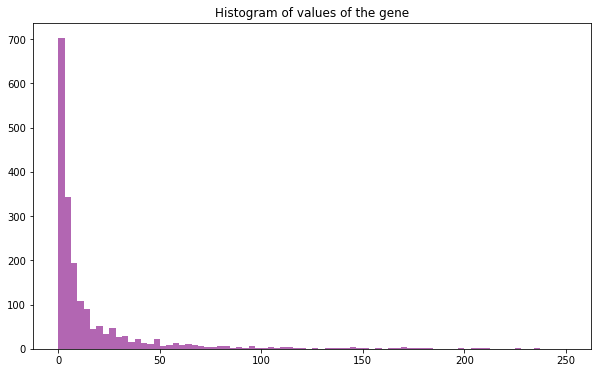

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(random_gene['values'], bins=80, 
        alpha=0.6, color = 'purple', range = (0,250))
ax.set_title('Histogram of values of the gene')
plt.show()

По гистограмме видна неравномерность покрытия генома. Чаще встречаются каунты со значениями в пределах 1-25.

Построим еще один график и посмотрим, какое число копий этого гена приходится на геномные позиции.

In [ ]:
random_gene_gr = random_gene.reset_index()
gen_p = random_gene_gr[["genomic position"]].to_numpy()
val = random_gene_gr[["values"]].to_numpy()

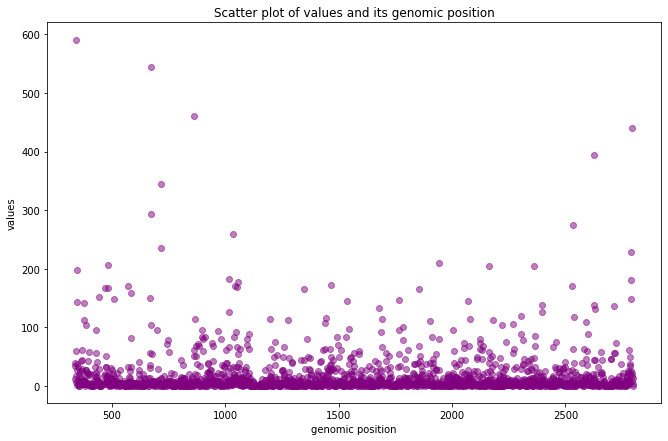

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))
ax.scatter(gen_p, val, c='purple', alpha=0.5)
ax.set_title('Scatter plot of values and its genomic position')
ax.set_xlabel('genomic position') 
ax.set_ylabel('values') 
plt.show()

Итого, по графику видно неравномерность покрытия генома. Большая часть каунтов гена по геномным позициям сконцентрирована в диапазоне 1-25.

Рассмотрите неравномерность покрытия на примере среднего по большому количеству генов (взяв за точку отсчёта старт-кодон)

In [ ]:
coverage = []
value = []

for x in annotation.index:
  genes_pos = track[track['genomic position'].between(annotation['1'][x], annotation['4641652'][x])]
  value = sum(genes_pos['values'])
  cov_df = pd.DataFrame({'values': value}, index = [x])
  coverage.append(cov_df)

coverage_df = pd.concat(coverage)
coverage_df['genomic position'] = annotation['1']
coverage_df.head()

,values,genomic position
0,811,190.0
2,34301,337.0
4,6706,2801.0
6,19619,3734.0
8,160,5234.0


Для начала построим гистограмму распределения полученных значений гена.

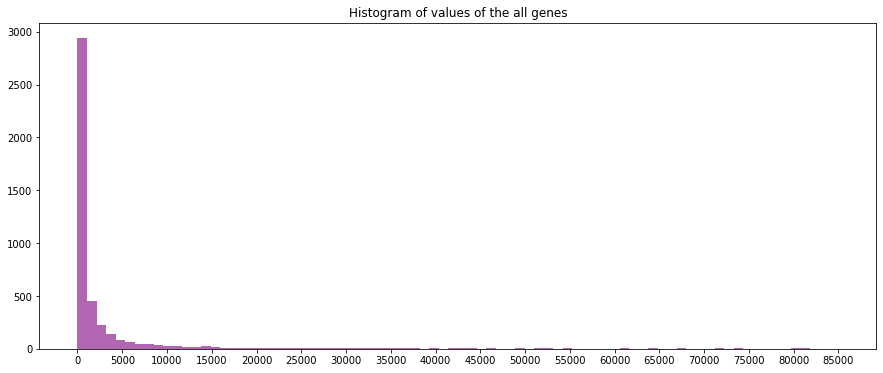

In [ ]:
from matplotlib.ticker import MultipleLocator


fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(coverage_df['values'], bins=80, 
        alpha=0.6, color = 'purple', range = (0,85000))
ax.set_title('Histogram of values of the all genes')
ax.xaxis.set_major_locator(MultipleLocator(5000))
plt.show()

По гистограмме видна неравномерность покрытия генома. Чаще встречаются каунты со значениями в пределах 1-1000.

Построим еще один график и посмотрим, какое число копий этого гена приходится на геномные позиции.

In [ ]:
coverage_df = coverage_df.reset_index()
gen_pos_all = coverage_df["genomic position"].to_numpy()
val_all = coverage_df["values"].to_numpy()

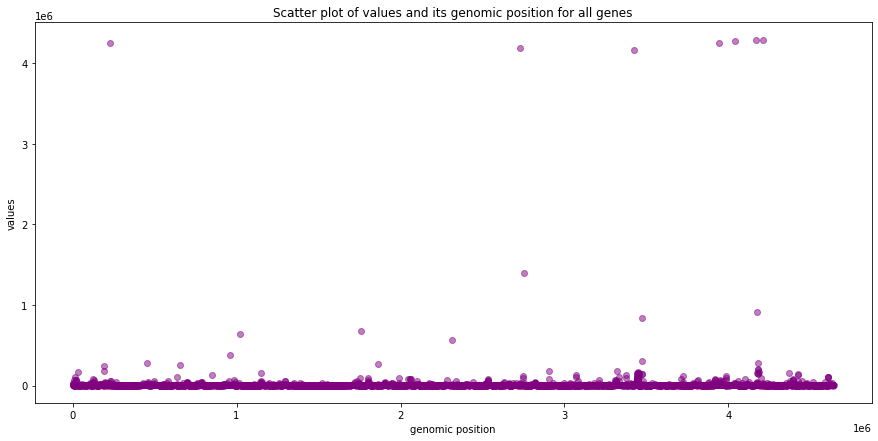

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(gen_pos_all, val_all, c='purple', alpha=0.5)
ax.set_title('Scatter plot of values and its genomic position for all genes')
ax.set_xlabel('genomic position') 
ax.set_ylabel('values') 
plt.show()

Итого, по графику видно неравномерность покрытия генома. Большая часть каунтов гена по геномным позициям, как было показано ранее, сконцентрирована в диапазоне 1-1000.

Свойство периодичности с тремя основаниями в области геномики - это свойство, которое характерно для последовательностей ДНК, кодирующих белок. Суть заключается в том, что нуклеотиды предпочтительно расположены на расстоянии 3, 6, 9 и т.д. оснований. Попробуем найти геномные позиции, различающиеся на число нуклеотидов, кратное трем.

In [ ]:
TMP = []
for i in random_gene['genomic position']:
  if i%3==0:
    TMP.append(i)

In [ ]:
TMP_df = random_gene[random_gene['genomic position'].isin(TMP)]
TMP_df = TMP_df.sort_values('genomic position')
TMP_df

,genomic position,values
112,339,12
115,342,59
118,345,27
121,348,2
124,351,9
...,...,...
2005,2784,38
2008,2787,34
2011,2790,149
2014,2793,17


Таким образом, нашлось 675 геномных позиций, которые располагаются на расстоянии кратном трем. Соответственно, периодичность присутствует.

Построим scatter plot для первых 10 геномных позиций.

In [ ]:
TMP_df_10 = TMP_df.head(10)
TMP_df_10

,genomic position,values
112,339,12
115,342,59
118,345,27
121,348,2
124,351,9
126,354,1
129,357,26
132,360,8
135,363,43
138,366,7


In [ ]:
gen_p_TMP = TMP_df_10["genomic position"].to_numpy()
val_TMP = TMP_df_10["values"].to_numpy()

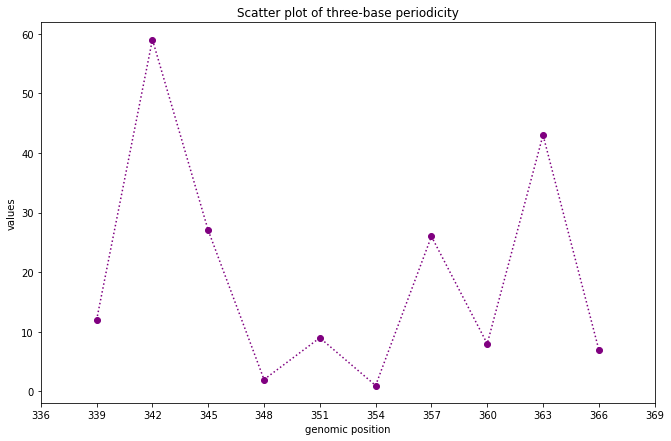

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))
ax.plot(gen_p_TMP, val_TMP, '-o', c='purple', linestyle = 'dotted')
ax.set_title('Scatter plot of three-base periodicity')
ax.set_xlabel('genomic position') 
ax.set_ylabel('values') 
ax.set_xlim(336, 369)
ax.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

In [ ]:
annotation = annotation.rename({'ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655' : 'ID'}, axis=1)
annotation.head()

,NC_000913.3,RefSeq,region,1,4641652,.,+,..1,ID
0,NC_000913.3,RefSeq,gene,190.0,255.0,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E..."
2,NC_000913.3,RefSeq,gene,337.0,2799.0,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E..."
4,NC_000913.3,RefSeq,gene,2801.0,3733.0,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E..."
6,NC_000913.3,RefSeq,gene,3734.0,5020.0,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E..."
8,NC_000913.3,RefSeq,gene,5234.0,5530.0,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G..."


2.2. Рассчитайте значения RPKM и TPM для каждого гена. В чём
разница между RPKM и TPM?


Эти метрики используются для нормализации глубины секвенирования и длины гена.

RPKM (Reads Per Kilobase Million) изначально был введен для облегчения сравнения уровней транскриптов как внутри образцов, так и между ними, поскольку он масштабирует количество генов, чтобы скорректировать различия как в размерах библиотеки, так и в длине гена.

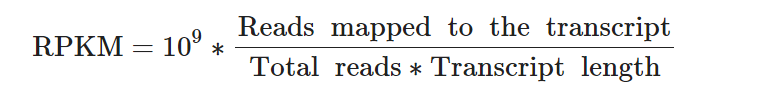

Предполагаемое значение RPKM - это мера относительной молярной концентрации РНК (rmc) транскрипта в образце. Если показатель количества РНК пропорционален rmc, то их среднее значение по генам в образце должно быть постоянным, а именно обратным количеству отображенных транскриптов. К сожалению, RPKM не учитывает это свойство инвариантности и, следовательно, не может быть точной мерой rmc. Среднее значение RPKM варьируется от образца к образцу. Поэтому был предложен TPM (transcripts per million), небольшая модификация RPKM.

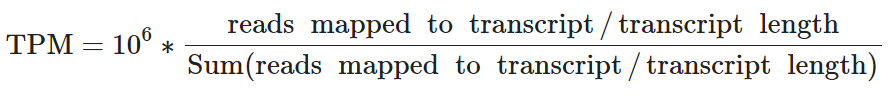

TPM и RPKM тесно связаны. Легко преобразовать RPKM в TPM, используя приведенную ниже формулу.

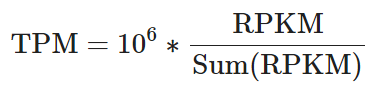

Когда используется TPM, сумма всех TPMs в каждом образце одинакова. Это облегчает сравнение доли ридов, сопоставленных с геном в каждом образце. В отличие от RPKM, сумма нормализованных значений в каждом образце может отличаться, и это затрудняет сравнение образцов.

TPM

1. Разделить каунты ридов на длину каждого гена в килобазах. Это дает количество операций чтения на килобазу (RPK).
2. Подсчитать все значения RPK в образце и разделить это число на 1 000 000. Это коэффициент масштабирования “на миллион”.
3. Разделить значения RPK на коэффициент масштабирования “на миллион”.

RPKM

1. Подсчитать общее количество ридов в образце и разделить это число на 1 000 000 – это наш коэффициент масштабирования “на миллион”.
2. Разделить каунты ридов на коэффициент масштабирования “на миллион”. Это нормализует глубину последовательности, давая вам количество считываний на миллион (RPM).
3. Разделить RPM на длину гена в килобазах.

In [ ]:
!pip install bioinfokit --upgrade

Создадим датасет, который будем использовать для анализа. Данный тул требует датасет, в котором будет столбец с суммой каунтов для каждого гена и длина каждого гена.

Для каждого гена вытащим его значения из датасета track по геномной позиции по аннотации, где указаны его вхождения в референсный геном (то есть координата начала и конца этого гена). Затем посчитаем сумму значений (каунтов) по всем геномным позициям каждого гена и длину каждого гена.

In [ ]:
RPKM_TPM = []
genes_positions = []
values = []
genes_lengths = []

for x in annotation.index:
  gen_pos = track[track['genomic position'].between(annotation['1'][x], annotation['4641652'][x])]
  values = sum(gen_pos['values'])
  genes_lengths = annotation['4641652'][x] - annotation['1'][x] + 1 
  preanalysis_df = pd.DataFrame({'length of genes': genes_lengths, 'values': values}, index = [x])
  RPKM_TPM.append(preanalysis_df)

analysis_df = pd.concat(RPKM_TPM)

analysis_df.head()

,length of genes,values
0,66.0,811
2,2463.0,34301
4,933.0,6706
6,1287.0,19619
8,297.0,160


Нормализуем каунты с помощью RPKM и TPM

In [ ]:
from bioinfokit.analys import norm, get_data

nm = norm()

nm.rpkm(df = analysis_df, gl = 'length of genes')
rpkm_df = nm.rpkm_norm

rpkm_df = rpkm_df.rename(columns={'values': 'RPKM'})


nm.tpm(df=analysis_df, gl='length of genes')
tpm_df = nm.tpm_norm

tpm_df = tpm_df.rename(columns={'values': 'TPM'})

Итоговый датасет

In [ ]:
pdList = [analysis_df, rpkm_df, tpm_df]
result_of_norm = pd.concat(pdList, axis = 1)
result_of_norm.head()

,length of genes,values,RPKM,TPM
0,66.0,811,208.081132,126.253658
2,2463.0,34301,235.829513,143.090045
4,933.0,6706,121.713202,73.849737
6,1287.0,19619,258.139286,156.626546
8,297.0,160,9.122614,5.535165


2.3. Проанализируйте значения RPKM для генов из оперона ATP.
Укажите геномные координаты оперона, а также то, какие гены в него входят.
Есть ли разница между RPKM у различных генов, присутствующих в опероне?
Как вы можете объяснить эту разницу с биологической точки зрения? Как вы
думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?

Вытащим из аннотации координаты оперона.

In [ ]:
annotation['Genes'] = annotation['ID'].apply(lambda s: s.split(";")[2])
annotation['ATP_operon'] = annotation['Genes'].apply(lambda s: s.split("=")[1])
del annotation['Genes']
annotation.head()

,NC_000913.3,RefSeq,region,1,4641652,.,+,..1,ID,ATP_operon
0,NC_000913.3,RefSeq,gene,190.0,255.0,.,+,.,"ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...",thrL
2,NC_000913.3,RefSeq,gene,337.0,2799.0,.,+,.,"ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...",thrA
4,NC_000913.3,RefSeq,gene,2801.0,3733.0,.,+,.,"ID=gene-b0003;Dbxref=ASAP:ABE-0000010,ECOCYC:E...",thrB
6,NC_000913.3,RefSeq,gene,3734.0,5020.0,.,+,.,"ID=gene-b0004;Dbxref=ASAP:ABE-0000012,ECOCYC:E...",thrC
8,NC_000913.3,RefSeq,gene,5234.0,5530.0,.,+,.,"ID=gene-b0005;Dbxref=ASAP:ABE-0000015,ECOCYC:G...",yaaX


Оставим только гены АТР оперона

In [ ]:
ATP_operon_genes = annotation.loc[annotation['ATP_operon'].isin(['atpA','atpB','atpC','atpD','atpE','atpF','atpG','atpH','atpI'])]
ATP_operon_genes

,NC_000913.3,RefSeq,region,1,4641652,.,+,..1,ID,ATP_operon
8035,NC_000913.3,RefSeq,gene,3915553.0,3915972.0,.,-,.,"ID=gene-b3731;Dbxref=ASAP:ABE-0012206,ECOCYC:E...",atpC
8037,NC_000913.3,RefSeq,gene,3915993.0,3917375.0,.,-,.,"ID=gene-b3732;Dbxref=ASAP:ABE-0012208,ECOCYC:E...",atpD
8039,NC_000913.3,RefSeq,gene,3917402.0,3918265.0,.,-,.,"ID=gene-b3733;Dbxref=ASAP:ABE-0012211,ECOCYC:E...",atpG
8041,NC_000913.3,RefSeq,gene,3918316.0,3919857.0,.,-,.,"ID=gene-b3734;Dbxref=ASAP:ABE-0012213,ECOCYC:E...",atpA
8043,NC_000913.3,RefSeq,gene,3919870.0,3920403.0,.,-,.,"ID=gene-b3735;Dbxref=ASAP:ABE-0012215,ECOCYC:E...",atpH
8045,NC_000913.3,RefSeq,gene,3920418.0,3920888.0,.,-,.,"ID=gene-b3736;Dbxref=ASAP:ABE-0012217,ECOCYC:E...",atpF
8047,NC_000913.3,RefSeq,gene,3920950.0,3921189.0,.,-,.,"ID=gene-b3737;Dbxref=ASAP:ABE-0012220,ECOCYC:E...",atpE
8049,NC_000913.3,RefSeq,gene,3921236.0,3922051.0,.,-,.,"ID=gene-b3738;Dbxref=ASAP:ABE-0012222,ECOCYC:E...",atpB
8051,NC_000913.3,RefSeq,gene,3922060.0,3922440.0,.,-,.,"ID=gene-b3739;Dbxref=ASAP:ABE-0012224,ECOCYC:E...",atpI


Для того, чтобы проанализировать значения RPKM для генов из оперона ATP, добавим в датасет, содержащий длины генов, сумму их каунтов, RPKM и TPM значения геномных позиций генов ATP оперона, а вместо индексов поставим названия генов.

In [ ]:
result_of_norm['genomic_position'] = annotation['1']
result_of_norm.genomic_position = result_of_norm.genomic_position.astype(int)

operon = result_of_norm[result_of_norm['genomic_position'].between(annotation['1'][8035], annotation['4641652'][8051])] 
operon = operon.set_index(ATP_operon_genes['ATP_operon'])
operon

,length of genes,values,RPKM,TPM,genomic_position
ATP_operon,,,,,
atpC,420.0,11576,466.729242,283.188934,3915553
atpD,1383.0,84139,1030.222309,625.089518,3915993
atpG,864.0,12618,247.304811,150.052706,3917402
atpA,1542.0,73134,803.139041,487.306275,3918316
atpH,534.0,9441,299.386715,181.653509,3919870
atpF,471.0,12632,454.158026,275.561322,3920418
atpE,240.0,71395,5037.468464,3056.494415,3920950
atpB,816.0,22903,475.289257,288.382741,3921236
atpI,381.0,511,22.711808,13.780437,3922060


Чтобы проанализировать значения RPKM для генов из оперона ATP было проще, отсортируем датасет так, чтобы наибольшее значение RPKM было в 1 строке (по убыванию)

In [ ]:
operon = operon.sort_values('RPKM', ascending = False)
operon

,length of genes,values,RPKM,TPM,genomic_position
ATP_operon,,,,,
atpE,240.0,71395,5037.468464,3056.494415,3920950
atpD,1383.0,84139,1030.222309,625.089518,3915993
atpA,1542.0,73134,803.139041,487.306275,3918316
atpB,816.0,22903,475.289257,288.382741,3921236
atpC,420.0,11576,466.729242,283.188934,3915553
atpF,471.0,12632,454.158026,275.561322,3920418
atpH,534.0,9441,299.386715,181.653509,3919870
atpG,864.0,12618,247.304811,150.052706,3917402
atpI,381.0,511,22.711808,13.780437,3922060


Построим Scatter plot и посмотрим, как распределяются RPKM по геномным позициям

In [ ]:
op_p = operon["genomic_position"].to_numpy()
op_rpkm = operon["RPKM"].to_numpy()
op_val = operon["values"].to_numpy()

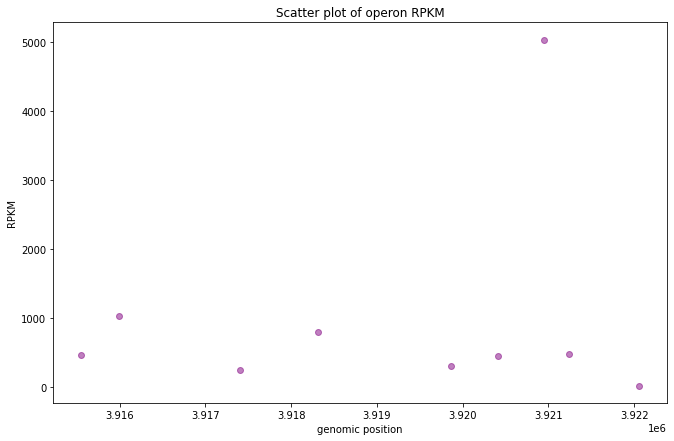

In [ ]:
fig, ax = plt.subplots(figsize=(11, 7))
ax.scatter(op_p, op_rpkm, c='purple', alpha=0.5)
ax.set_title('Scatter plot of operon RPKM')
ax.set_xlabel('genomic position') 
ax.set_ylabel('RPKM') 
plt.show()

Гены из оперона АТР кодируют белки, которые находятся в АТФ-синтазном комплексе. Комплекс состоит из F0 и F1 субъединиц. Он похож на грибок. У него есть трансмембранная ножка - с-кольцо, в котором много с субъединиц (обычно от 9 до 12), кодируемых геном *atpE*. Также есть шляпка в цитоплазме, в которой находятся каталитически активные субъединицы α и  β, по 3 штуки каждой. Эти субъединицы кодируются генами *atpA* и *atpD* соответственно. Кроме того, у комплекса есть вспомогательные белки, которые соединяют цитоплазматическую шляпку и трансмембранную ножку или помогают работе АТФ-синтазного комплекса. Это белки а, b, δ, γ, ε, которые кодируются генами *atpB*, *atpF*, *atpH*, *atpG*, *atpC*. В большинстве бактериальных АТФ-оперонах, перед восьмью структурными генами АТФ-синтазы расположен девятый ген *atpI*, кодирующий гидрофобный белок, предположительно имеющий 4 трансмембранные спирали (ТМН). 

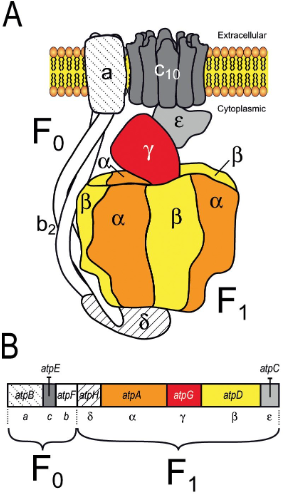

Пример схемы оперона АТФ-синтазного комплекса

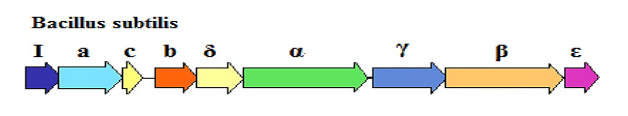

В большинстве бактериальных АТФ-оперонах, перед восьмью структурными генами АТФ-синтазы расположен девятый ген, кодирующий регуляторный белок AtpI. Это ген atpI, который кодирует гидрофобный белок, предположительно имеющий 4 трансмембранные спирали (ТМН). 

По наибольшему RPKM в порядке убывания наши гены располагаются в следующем порядке:

atpE -> atpD -> atpA -> atpB -> atpC -> atpF -> atpH -> atpG -> atpI

# c-кольцо 
Длина гена *atpE* небольшая, однако он кодирует от 9 до 12 с субъединиц с-кольца, поэтому число каунтов этого гена очень большое. Из-за этого у него большое покрытие.
# F1 гексамер АТФ-синтазного комплекса
Гены *atpD* и *atpA* имеют большую длину, но при этом у них большое число каунтов, так как каждый из них кодирует по 3 каталитически активных субъединицы β и α соответственно. Их покрытие меньше покрытия *atpE*, так как длины их генов значительно больше, чем длина гена *atpE*, однако все равно больше покрытий последующих генов за счет большого числа каунтов.
# Вспомогательные белки
Гены *atpB*, *atpC* и *atpF* имеют примерно одинаковое покрытие, причем каунты и длины генов двух последних почти одинаковые. Число каунтов и длина гена *atpB* примерно в 2 раза больше, чем у *atpC* и *atpF*, но за счет нормировки его покрытие примерно такое же, как у этих генов.

Покрытие генов *atpH* и *atpG* почти одинаковое, но немного различаются. У последнего больше длина и число каунтов, но покрытие лучше у первого по соотношению число каунтов-длина.

Покрытие гена *atpI* очень маленькое, так как у него очень мало каунтов. Последовательность *atpI* не высоко консервативна у различных видов. В некоторых случаях *atpI* находится под контролем отдельного промотора других генов АТФ, либо полностью отсутствует.



Пример отсутствия гена atpI в опероне АТФ-синтазного комплекса

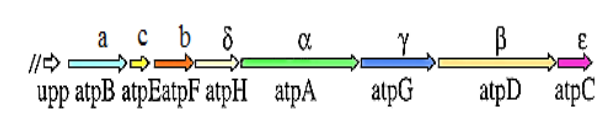

в случае с Рибо-сек мы рассматриваем релально транслируемые гены, тогда как при анализе РНК-секвенирования мы будем в равной степени оценивать важность транскриптов, которые нормально процессируются и деградируются.

RNA-seq широко используется в качестве высокопроизводительного метода для характеристики динамических изменений транскриптов. По сравнению с РНК-Seq, Ribo-Seq нацелен только на **последовательности мРНК, защищенные рибосомой в процессе декодирования трансляцией, что раскрывает состав и регуляцию экспрессированного протеома**. Под действием ингибиторов трансляции транслируемая рибосома фиксируется к последовательности мРНК или сайту инициации трансляции. После лизиса клеток РНКазу добавляется в клеточный лизат для переваривания мРНК, которая не защищена рибосомами. Одиночная рибосома выделяется, а **короткие фрагменты мРНК, которые не перевариваются на рибосоме**, извлекаются и очищаются для секвенирования библиотеки и анализа данных. Профилирование рибосом легко адаптируется к разнообразию организмов, что позволяет проводить высокоточные исследования трансляции белка на геномном уровне. Таким образом, в отличие от RNA-seq, при котором не все полученные транскрипты могут в процессе трансляции давать белки, так как могут деградировать, Ribo-seq позволяет выделать такие фрагменты мРНК, из которых в процессе трансляции будут получаться белки. Поэтому оценивать разницу между RPKM у различных генов нужно при помощи Ribo-Seq, а не RNA-seq.